# USDA SR28 Database Analysis

Comprehensive analysis of the USDA National Nutrient Database for Standard Reference, Release 28.

This notebook explores:
- Food descriptions and categories
- Nutrient distributions across food groups
- Comparisons of nutrient content
- Interesting patterns and insights


In [1]:
# Import libraries
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.data_loader import NutritionDataLoader, inspect_data

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

%matplotlib inline


## 1. Load USDA Data

We'll load the USDA SR28 database tables separately first, then merge them.


In [2]:
# Initialize loader
loader = NutritionDataLoader(processed_dir='../data/processed')

# Load individual tables
print("Loading USDA tables...\n")
df_food_des = loader.load_usda_table('FOOD_DES')
df_fd_group = loader.load_usda_table('FD_GROUP')
df_nutr_def = loader.load_usda_table('NUTR_DEF')
df_nut_data = loader.load_usda_table('NUT_DATA')


self.processed_dir: ../data/processed
Loading USDA tables...

Loading USDA FOOD_DES from Parquet...
✓ Loaded 8,789 rows
Loading USDA FD_GROUP from Parquet...
✓ Loaded 25 rows
Loading USDA NUTR_DEF from Parquet...
✓ Loaded 150 rows
Loading USDA NUT_DATA from Parquet...
✓ Loaded 679,045 rows


## 2. Explore Food Descriptions


In [17]:
# Inspect food descriptions
print("FOOD DESCRIPTIONS TABLE")
print("="*70)
inspect_data(df_food_des, show_stats=False)




FOOD DESCRIPTIONS TABLE

DATASET OVERVIEW

Shape: 8,789 rows × 14 columns

Columns: ['NDB_No', 'FdGrp_Cd', 'Long_Desc', 'Shrt_Desc', 'ComName', 'ManufacName', 'Survey', 'Ref_desc', 'Refuse', 'SciName', 'N_Factor', 'Pro_Factor', 'Fat_Factor', 'CHO_Factor']

Data types:
NDB_No           int64
FdGrp_Cd         int64
Long_Desc       object
Shrt_Desc       object
ComName         object
ManufacName     object
Survey          object
Ref_desc        object
Refuse         float64
SciName         object
N_Factor       float64
Pro_Factor     float64
Fat_Factor     float64
CHO_Factor     float64
dtype: object

Missing values:
  ComName: 7,678 (87.4%)
  ManufacName: 7,082 (80.6%)
  Survey: 5,385 (61.3%)
  Ref_desc: 6,819 (77.6%)
  Refuse: 50 (0.6%)
  SciName: 8,054 (91.6%)
  N_Factor: 2,325 (26.5%)
  Pro_Factor: 4,200 (47.8%)
  Fat_Factor: 4,102 (46.7%)
  CHO_Factor: 4,207 (47.9%)



In [16]:
# Show sample foods
print("\nSample foods:")
#print(df_food_des[['NDB_No', 'Long_Desc', 'FdGrp_Cd']].head(10))
print(df_food_des.head(10))


Sample foods:
   NDB_No  FdGrp_Cd                   Long_Desc               Shrt_Desc  \
0    1001       100              Butter, salted        BUTTER,WITH SALT   
1    1002       100  Butter, whipped, with salt  BUTTER,WHIPPED,W/ SALT   
2    1003       100       Butter oil, anhydrous    BUTTER OIL,ANHYDROUS   
3    1004       100                Cheese, blue             CHEESE,BLUE   
4    1005       100               Cheese, brick            CHEESE,BRICK   
5    1006       100                Cheese, brie             CHEESE,BRIE   
6    1007       100           Cheese, camembert        CHEESE,CAMEMBERT   
7    1008       100             Cheese, caraway          CHEESE,CARAWAY   
8    1009       100             Cheese, cheddar          CHEESE,CHEDDAR   
9    1010       100            Cheese, cheshire         CHEESE,CHESHIRE   

  ComName ManufacName Survey Ref_desc  Refuse SciName  N_Factor  Pro_Factor  \
0    None        None      Y     None     0.0    None      6.38        4.27   
1


FOOD GROUPS DISTRIBUTION
FdGrp_Desc
Beef Products                          961
Baked Products                         879
Vegetables and Vegetable Products      836
Soups, Sauces, and Gravies             465
Lamb, Veal, and Game Products          464
Poultry Products                       389
Legumes and Legume Products            381
Beverages                              371
Baby Foods                             367
Fast Foods                             363
Sweets                                 360
Fruits and Fruit Juices                360
Breakfast Cereals                      356
Pork Products                          341
Dairy and Egg Products                 283
Finfish and Shellfish Products         265
Fats and Oils                          220
Cereal Grains and Pasta                181
Snacks                                 177
Sausages and Luncheon Meats            170
American Indian/Alaska Native Foods    165
Nut and Seed Products                  137
Meals, Entrees, a

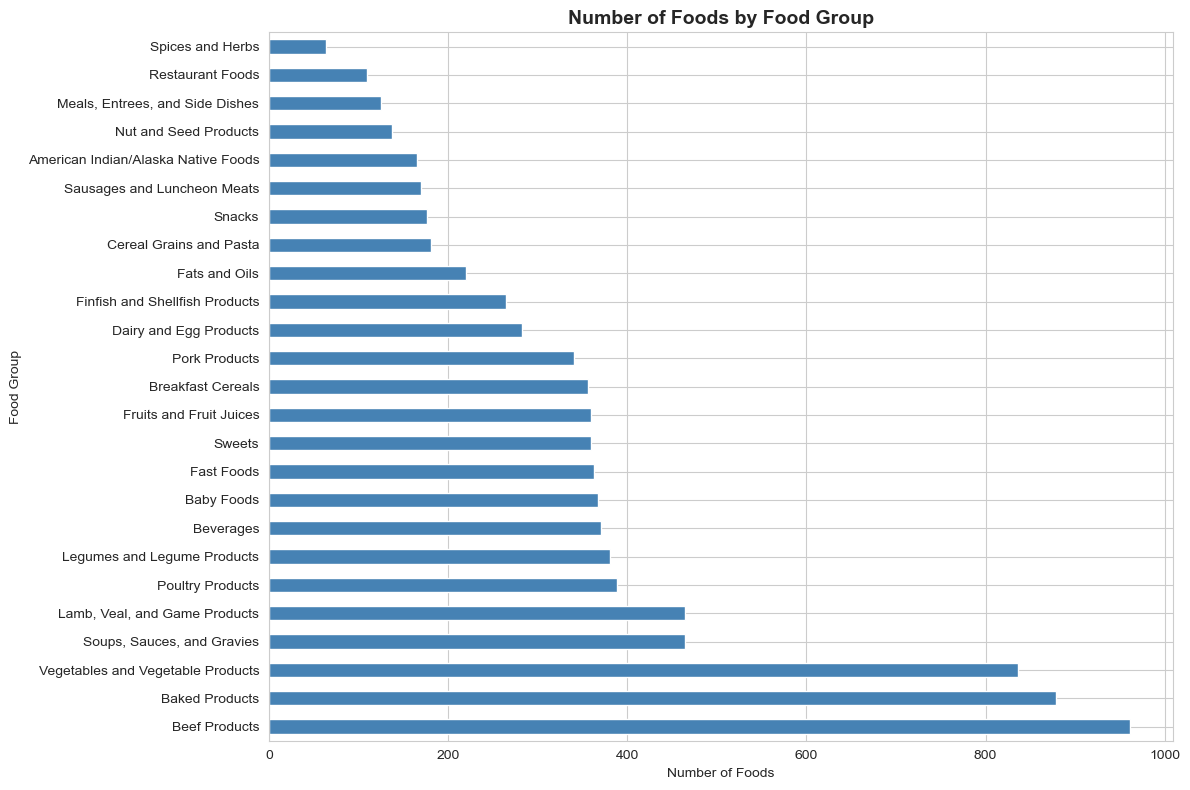

In [4]:
# Explore food groups
df_food_with_groups = df_food_des.merge(df_fd_group, on='FdGrp_Cd', how='left')

print("\nFOOD GROUPS DISTRIBUTION")
print("="*70)
group_counts = df_food_with_groups['FdGrp_Desc'].value_counts()
print(group_counts)

# Visualize food groups
plt.figure(figsize=(12, 8))
group_counts.plot(kind='barh', color='steelblue')
plt.title('Number of Foods by Food Group', fontsize=14, fontweight='bold')
plt.xlabel('Number of Foods')
plt.ylabel('Food Group')
plt.tight_layout()
plt.show()


## 3. Explore Nutrient Definitions


In [5]:
# Show available nutrients
print("NUTRIENT DEFINITIONS")
print("="*70)
print(f"Total nutrients tracked: {len(df_nutr_def)}\n")

# Show key nutrients
key_nutrients = ['Energy', 'Protein', 'Carbohydrate', 'Sugars', 'Fiber', 
                'Fat', 'Fatty acids, total saturated', 'Sodium', 'Cholesterol']

key_nutr = df_nutr_def[df_nutr_def['NutrDesc'].isin(key_nutrients)]
print("Key Macronutrients:")
print(key_nutr[['Nutr_No', 'NutrDesc', 'Units']].to_string(index=False))

print("\n\nAll nutrients by category:")
print(df_nutr_def[['Nutr_No', 'NutrDesc', 'Units']].head(20))


NUTRIENT DEFINITIONS
Total nutrients tracked: 150

Key Macronutrients:
 Nutr_No                     NutrDesc Units
     203                      Protein     g
     208                       Energy  kcal
     268                       Energy    kJ
     601                  Cholesterol    mg
     606 Fatty acids, total saturated     g


All nutrients by category:
    Nutr_No                     NutrDesc Units
0       203                      Protein     g
1       204            Total lipid (fat)     g
2       205  Carbohydrate, by difference     g
3       207                          Ash     g
4       208                       Energy  kcal
5       209                       Starch     g
6       210                      Sucrose     g
7       211           Glucose (dextrose)     g
8       212                     Fructose     g
9       213                      Lactose     g
10      214                      Maltose     g
11      221               Alcohol, ethyl     g
12      255              

## 4. Load and Analyze Merged Data

Merge all tables to get complete nutrient information for each food.


In [6]:
# Load merged data (this combines everything)
df_merged = loader.load_usda_merged()

# Add food group descriptions
df_merged = df_merged.merge(df_fd_group, on='FdGrp_Cd', how='left')

print(f"Merged dataset shape: {df_merged.shape}")
print(f"Foods: {len(df_merged):,}")
print(f"Total columns: {len(df_merged.columns)}")
print(f"\nFirst few foods with nutrients:")
print(df_merged[['Long_Desc', 'FdGrp_Desc']].head())



Loading and merging USDA SR28 tables...
Loading USDA FOOD_DES from Parquet...
✓ Loaded 8,789 rows
Loading USDA NUT_DATA from Parquet...
✓ Loaded 679,045 rows
Loading USDA NUTR_DEF from Parquet...
✓ Loaded 150 rows
Merging nutrient values with definitions...
Pivoting nutrients to columns...
Merging with food descriptions...
✓ Merged: 8,789 foods with 163 columns
Merged dataset shape: (8789, 164)
Foods: 8,789
Total columns: 164

First few foods with nutrients:
                    Long_Desc              FdGrp_Desc
0              Butter, salted  Dairy and Egg Products
1  Butter, whipped, with salt  Dairy and Egg Products
2       Butter oil, anhydrous  Dairy and Egg Products
3                Cheese, blue  Dairy and Egg Products
4               Cheese, brick  Dairy and Egg Products


## 5. Analyze Key Nutrients Across Food Groups


PROTEIN CONTENT BY FOOD GROUP (g per 100g)
                                          mean  median        std  count
FdGrp_Desc                                                              
Beef Products                        24.359105  24.210   5.065182    961
Poultry Products                     23.166298  23.350   4.910334    389
Lamb, Veal, and Game Products        23.111379  22.880   6.013581    464
Pork Products                        22.088944  22.040   5.876626    341
Finfish and Shellfish Products       20.342642  20.100   5.773388    265
American Indian/Alaska Native Foods  15.996061  11.700  16.699485    165
Sausages and Luncheon Meats          15.414235  14.545   4.342997    170
Nut and Seed Products                15.247080  15.520  10.312863    137
Dairy and Egg Products               14.106148  10.000  13.756124    283
Legumes and Legume Products          14.047874   9.600  11.798851    381
Fast Foods                           12.118678  12.090   5.628175    363
Restaura

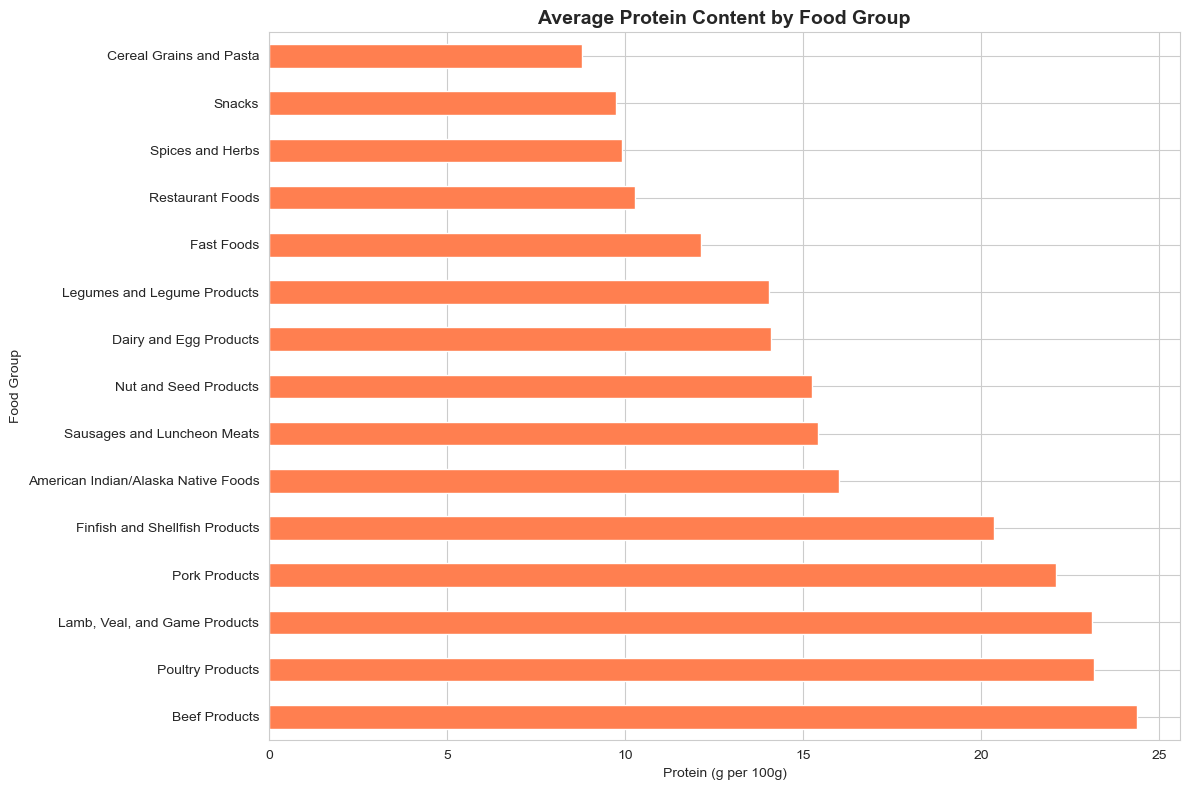

In [7]:
# Analyze protein content by food group
if 'Protein' in df_merged.columns:
    protein_by_group = df_merged.groupby('FdGrp_Desc')['Protein'].agg(['mean', 'median', 'std', 'count'])
    protein_by_group = protein_by_group.sort_values('mean', ascending=False)
    
    print("PROTEIN CONTENT BY FOOD GROUP (g per 100g)")
    print("="*70)
    print(protein_by_group.head(15))
    
    # Visualize
    plt.figure(figsize=(12, 8))
    protein_by_group['mean'].head(15).plot(kind='barh', color='coral')
    plt.title('Average Protein Content by Food Group', fontsize=14, fontweight='bold')
    plt.xlabel('Protein (g per 100g)')
    plt.ylabel('Food Group')
    plt.tight_layout()
    plt.show()
else:
    print("Protein column not found in merged data")



ENERGY (CALORIES) BY FOOD GROUP (kcal per 100g)
                                     mean  median         std
FdGrp_Desc                                                   
Fats and Oils                  623.695455   717.5  297.350543
Nut and Seed Products          496.554745   574.0  171.162286
Snacks                         443.050847   432.0   65.288109
Baked Products                 387.261661   406.0   98.320462
Breakfast Cereals              341.971910   370.0   93.228898
Sweets                         328.716667   365.5  158.331684
Cereal Grains and Pasta        284.127072   352.0  111.206716
Sausages and Luncheon Meats    257.294118   267.0   91.133860
Fast Foods                     252.534435   261.0   67.452671
Spices and Herbs               248.437500   283.5  133.429117
Dairy and Egg Products         223.717314   186.0  152.134498
Restaurant Foods               220.660550   203.0   83.766123
Lamb, Veal, and Game Products  215.724138   196.0  103.578902
Beef Products        

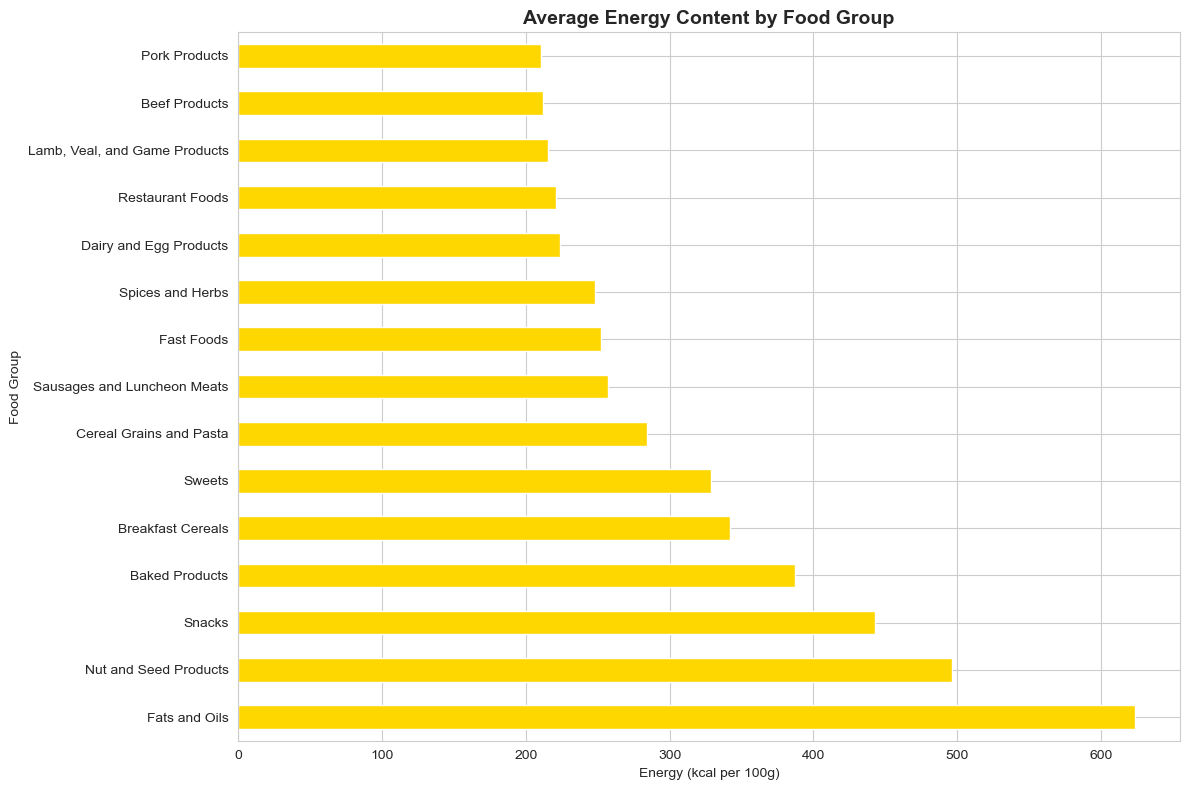

In [8]:
# Analyze energy (calories) by food group
if 'Energy' in df_merged.columns:
    energy_by_group = df_merged.groupby('FdGrp_Desc')['Energy'].agg(['mean', 'median', 'std'])
    energy_by_group = energy_by_group.sort_values('mean', ascending=False)
    
    print("\nENERGY (CALORIES) BY FOOD GROUP (kcal per 100g)")
    print("="*70)
    print(energy_by_group.head(15))
    
    # Visualize
    plt.figure(figsize=(12, 8))
    energy_by_group['mean'].head(15).plot(kind='barh', color='gold')
    plt.title('Average Energy Content by Food Group', fontsize=14, fontweight='bold')
    plt.xlabel('Energy (kcal per 100g)')
    plt.ylabel('Food Group')
    plt.tight_layout()
    plt.show()
else:
    print("Energy column not found")


## 6. Compare Macronutrients


MACRONUTRIENT COMPARISON (g per 100g)
                                   Protein  Total lipid (fat)  \
FdGrp_Desc                                                      
Baby Foods                            4.06               5.46   
Baked Products                        6.51              14.22   
Beef Products                        24.36              12.24   
Beverages                             2.24               0.95   
Fast Foods                           12.12              12.54   
Lamb, Veal, and Game Products        23.11              13.12   
Legumes and Legume Products          14.05               7.54   
Poultry Products                     23.17              10.66   
Soups, Sauces, and Gravies            2.85               2.99   
Vegetables and Vegetable Products     2.80               0.99   

                                   Carbohydrate, by difference  
FdGrp_Desc                                                      
Baby Foods                                         

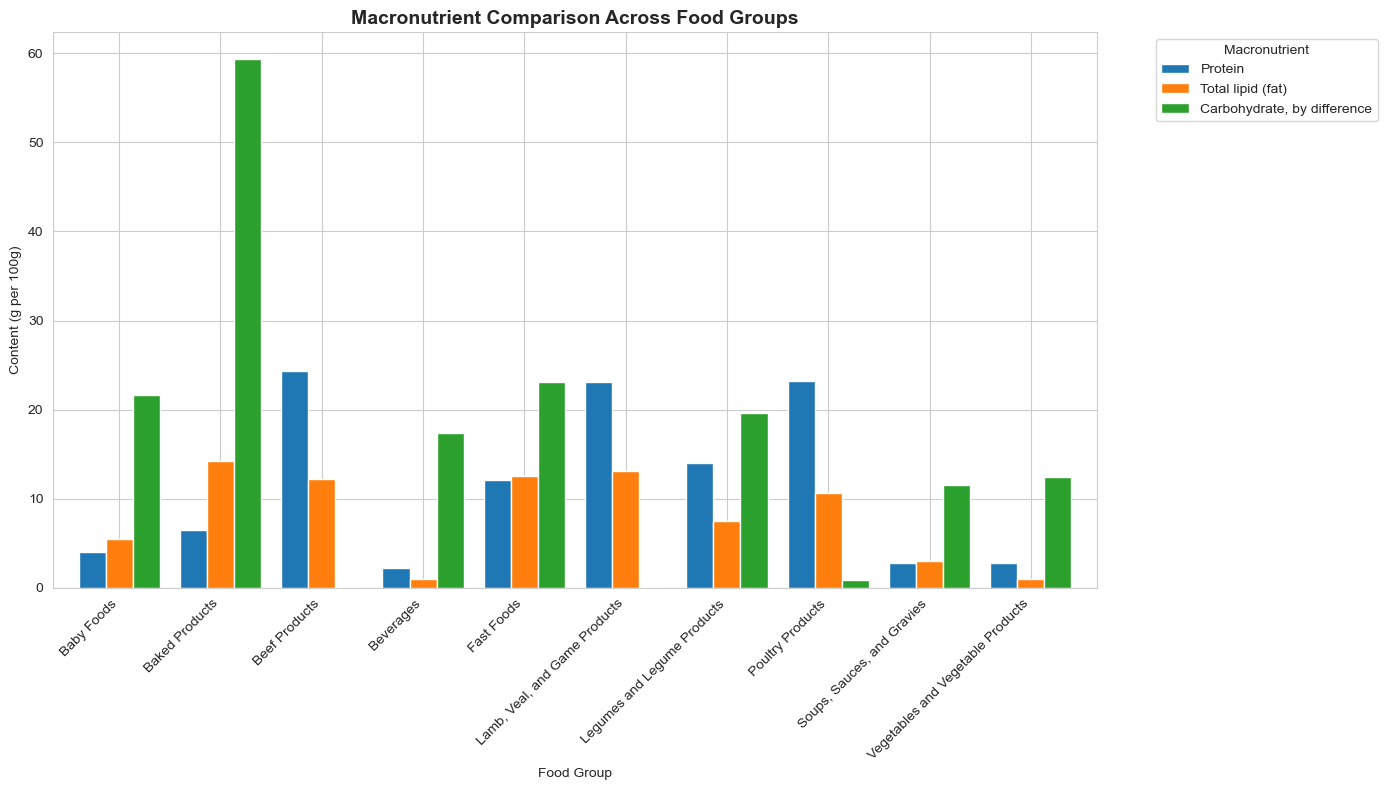

In [9]:
# Compare protein, fat, and carbs across top food groups
macros = ['Protein', 'Total lipid (fat)', 'Carbohydrate, by difference']
available_macros = [m for m in macros if m in df_merged.columns]

if available_macros:
    # Get top 10 food groups by number of foods
    top_groups = df_merged['FdGrp_Desc'].value_counts().head(10).index
    df_top = df_merged[df_merged['FdGrp_Desc'].isin(top_groups)]
    
    # Calculate mean macros
    macro_comparison = df_top.groupby('FdGrp_Desc')[available_macros].mean()
    
    print("MACRONUTRIENT COMPARISON (g per 100g)")
    print("="*70)
    print(macro_comparison.round(2))
    
    # Visualize as grouped bar chart
    fig, ax = plt.subplots(figsize=(14, 8))
    macro_comparison.plot(kind='bar', ax=ax, width=0.8)
    plt.title('Macronutrient Comparison Across Food Groups', fontsize=14, fontweight='bold')
    plt.xlabel('Food Group')
    plt.ylabel('Content (g per 100g)')
    plt.legend(title='Macronutrient', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Macronutrient columns not found")


## 7. Find High-Nutrient Foods


In [10]:
# Find foods highest in protein
if 'Protein' in df_merged.columns:
    high_protein = df_merged.nlargest(20, 'Protein')[['Long_Desc', 'FdGrp_Desc', 'Protein']]
    print("TOP 20 HIGH-PROTEIN FOODS (g per 100g)")
    print("="*70)
    print(high_protein.to_string(index=False))
    
# Find foods highest in fiber
if 'Fiber, total dietary' in df_merged.columns:
    print("\n\nTOP 20 HIGH-FIBER FOODS (g per 100g)")
    print("="*70)
    high_fiber = df_merged.nlargest(20, 'Fiber, total dietary')[['Long_Desc', 'FdGrp_Desc', 'Fiber, total dietary']]
    print(high_fiber.to_string(index=False))


TOP 20 HIGH-PROTEIN FOODS (g per 100g)
                                                    Long_Desc                          FdGrp_Desc  Protein
                                          Soy protein isolate         Legumes and Legume Products    88.32
                          Soy protein isolate, potassium type         Legumes and Legume Products    88.32
                            Gelatins, dry powder, unsweetened                              Sweets    85.60
               Egg, white, dried, stabilized, glucose reduced              Dairy and Egg Products    84.08
          Seal, bearded (Oogruk), meat, dried (Alaska Native) American Indian/Alaska Native Foods    82.60
       Egg, white, dried, powder, stabilized, glucose reduced              Dairy and Egg Products    82.40
                                            Egg, white, dried              Dairy and Egg Products    81.10
                         Beverages, Protein powder whey based                           Beverages    78.1

## 8. Nutrient Density Analysis

Calculate nutrient density scores to find the most nutrient-rich foods.


In [11]:
# Calculate a simple nutrient density score
# Higher protein + fiber, lower energy = better

score_cols = []
if 'Protein' in df_merged.columns:
    score_cols.append('Protein')
if 'Fiber, total dietary' in df_merged.columns:
    score_cols.append('Fiber, total dietary')
if 'Energy' in df_merged.columns:
    score_cols.append('Energy')

if len(score_cols) >= 2:
    df_score = df_merged.copy()
    
    # Normalize values (0-1 scale)
    if 'Protein' in score_cols:
        df_score['protein_norm'] = df_score['Protein'] / df_score['Protein'].max()
    if 'Fiber, total dietary' in score_cols:
        df_score['fiber_norm'] = df_score['Fiber, total dietary'] / df_score['Fiber, total dietary'].max()
    if 'Energy' in score_cols:
        df_score['energy_norm'] = 1 - (df_score['Energy'] / df_score['Energy'].max())  # Inverse for energy
    
    # Calculate nutrient density score
    norm_cols = [c for c in ['protein_norm', 'fiber_norm', 'energy_norm'] if c in df_score.columns]
    df_score['nutrient_density'] = df_score[norm_cols].mean(axis=1)
    
    # Get top foods by nutrient density
    top_dense = df_score.nlargest(20, 'nutrient_density')[['Long_Desc', 'FdGrp_Desc', 'Protein', 'Fiber, total dietary', 'Energy', 'nutrient_density']]
    
    print("TOP 20 MOST NUTRIENT-DENSE FOODS")
    print("(High protein + fiber, moderate calories)")
    print("="*70)
    print(top_dense.to_string(index=False))


TOP 20 MOST NUTRIENT-DENSE FOODS
(High protein + fiber, moderate calories)
                                                                                                 Long_Desc                          FdGrp_Desc  Protein  Fiber, total dietary  Energy  nutrient_density
                                             Seal, bearded (Oogruk), meat, partially dried (Alaska Native) American Indian/Alaska Native Foods    62.38                   NaN   270.0          0.703480
                                                                       Walrus, meat, dried (Alaska Native) American Indian/Alaska Native Foods    57.00                   NaN   251.0          0.683555
                                                          Fish, herring eggs, Pacific, dry (Alaska Native) American Indian/Alaska Native Foods    60.40                   NaN   312.0          0.668989
                                                                                          Corn bran, crude             Cereal

## 9. Visualize Nutrient Distributions


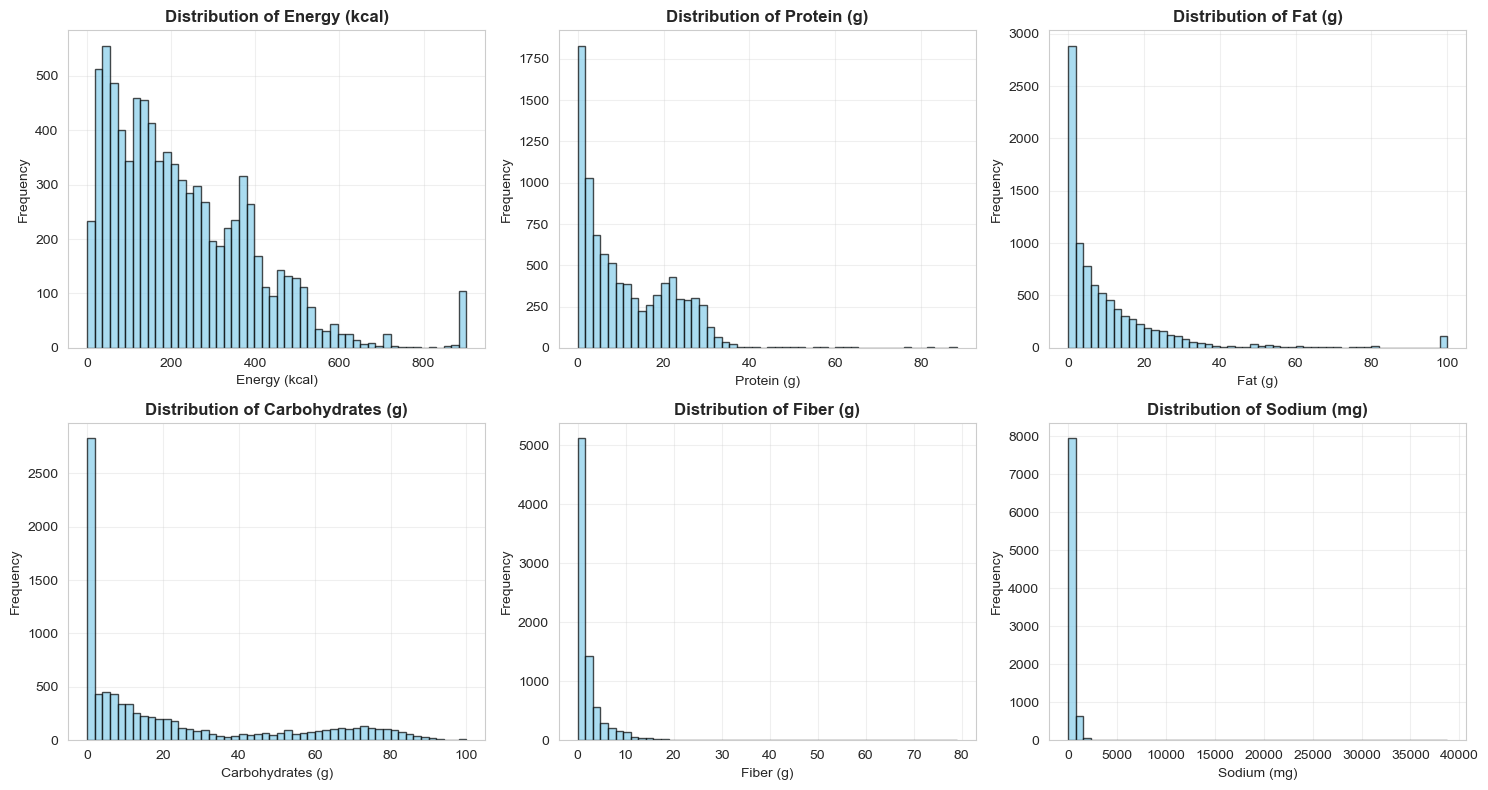

In [12]:
# Create distribution plots for key nutrients
nutrients_to_plot = {
    'Energy': 'Energy (kcal)',
    'Protein': 'Protein (g)',
    'Total lipid (fat)': 'Fat (g)',
    'Carbohydrate, by difference': 'Carbohydrates (g)',
    'Fiber, total dietary': 'Fiber (g)',
    'Sodium, Na': 'Sodium (mg)'
}

available_nutrients = {k: v for k, v in nutrients_to_plot.items() if k in df_merged.columns}

if available_nutrients:
    n_plots = len(available_nutrients)
    n_cols = 3
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten() if n_plots > 1 else [axes]
    
    for idx, (col, label) in enumerate(available_nutrients.items()):
        if idx < len(axes):
            data = df_merged[col].dropna()
            axes[idx].hist(data, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
            axes[idx].set_title(f'Distribution of {label}', fontweight='bold')
            axes[idx].set_xlabel(label)
            axes[idx].set_ylabel('Frequency')
            axes[idx].grid(True, alpha=0.3)
    
    # Hide extra subplots
    for idx in range(n_plots, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("Nutrient columns not found for plotting")


## 10. Summary Statistics


In [13]:
# Overall summary statistics
print("USDA SR28 DATABASE SUMMARY")
print("="*70)
print(f"Total Foods: {len(df_merged):,}")
print(f"Food Groups: {df_merged['FdGrp_Desc'].nunique()}")
print(f"Total Nutrient Columns: {len([c for c in df_merged.columns if c not in ['NDB_No', 'FdGrp_Cd', 'Long_Desc', 'Shrt_Desc', 'FdGrp_Desc']])}")

print("\n\nFood Groups:")
print(df_merged['FdGrp_Desc'].value_counts())

# Key statistics
key_stats = ['Energy', 'Protein', 'Total lipid (fat)', 'Carbohydrate, by difference']
available_stats = [s for s in key_stats if s in df_merged.columns]

if available_stats:
    print("\n\nKey Nutrient Statistics (per 100g):")
    print("="*70)
    print(df_merged[available_stats].describe().round(2))


USDA SR28 DATABASE SUMMARY
Total Foods: 8,789
Food Groups: 25
Total Nutrient Columns: 159


Food Groups:
FdGrp_Desc
Beef Products                          961
Baked Products                         879
Vegetables and Vegetable Products      836
Soups, Sauces, and Gravies             465
Lamb, Veal, and Game Products          464
Poultry Products                       389
Legumes and Legume Products            381
Beverages                              371
Baby Foods                             367
Fast Foods                             363
Sweets                                 360
Fruits and Fruit Juices                360
Breakfast Cereals                      356
Pork Products                          341
Dairy and Egg Products                 283
Finfish and Shellfish Products         265
Fats and Oils                          220
Cereal Grains and Pasta                181
Snacks                                 177
Sausages and Luncheon Meats            170
American Indian/Alaska N

## Next Steps

- Use this USDA data for nutrition classification models
- Compare with Open Food Facts data
- Create healthy/unhealthy labels based on nutrient thresholds
- Build recommendation systems for nutrient-dense foods
